In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
data.shape #dimensions

(1461, 6)

<Axes: xlabel='weather_encoded', ylabel='count'>

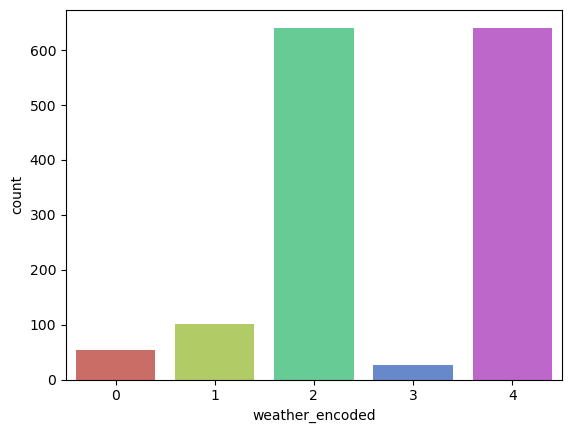

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
data['weather_encoded'] = le.fit_transform(data['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))

# Plot the count of each unique value in the weather column with actual names on the labels
sns.countplot(x='weather_encoded', data=data, palette='hls', 
              tick_label=list(weather_names.values()))

In [6]:
# Get the value counts of each unique value in the weather column
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [7]:
data[["precipitation","temp_max","temp_min","wind"]].describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


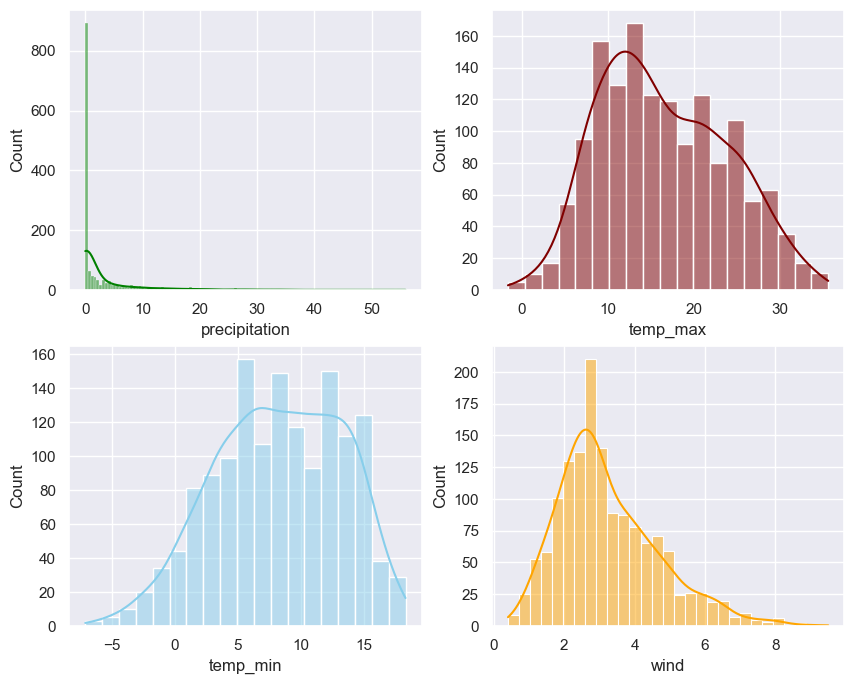

In [8]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "maroon", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True,ax=axs[i//2, i%2], color=colors[i])

In [9]:
data.head

<bound method NDFrame.head of             date  precipitation  temp_max  temp_min  wind  weather  \
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle   
1     2012-01-02           10.9      10.6       2.8   4.5     rain   
2     2012-01-03            0.8      11.7       7.2   2.3     rain   
3     2012-01-04           20.3      12.2       5.6   4.7     rain   
4     2012-01-05            1.3       8.9       2.8   6.1     rain   
...          ...            ...       ...       ...   ...      ...   
1456  2015-12-27            8.6       4.4       1.7   2.9     rain   
1457  2015-12-28            1.5       5.0       1.7   1.3     rain   
1458  2015-12-29            0.0       7.2       0.6   2.6      fog   
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun   
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun   

      weather_encoded  
0                   0  
1                   2  
2                   2  
3                   2  
4        

In [10]:
data

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


In [12]:
null_count = data.isnull().sum()

# Print the number of null values in each column
print(null_count)

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
weather_encoded    0
dtype: int64


In [13]:
# Drop the "date" column from the dataframe
df = data.drop("date", axis=1)

# Display the first 5 rows of the resulting dataframe
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


In [16]:
#we no longer need weather column 
if "weather" in df.columns:
    df = df.drop("weather", axis=1)


x = ((df.loc[:,df.columns!="weather_encoded"]).astype(int)).values[:,0:]
y = df["weather_encoded"].values

In [17]:
df.weather_encoded.unique()

array([0, 2, 4, 3, 1])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# calculate the accuracy score of the KNN classifier on the test data
knn_score = knn.score(x_test, y_test)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.7687074829931972


In [20]:
# use the KNN classifier to predict the labels of the test data
y_pred_knn = knn.predict(x_test)

# create a confusion matrix of the KNN classifier's predictions
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrix
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[ 0  1  0  0  4]
 [ 0  0  0  0  5]
 [ 0  1 67  1 10]
 [ 0  0  3  3  0]
 [ 1  2  6  0 43]]


In [52]:
# print classification report for KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
print('KNN Classification Report\n')
# set zero_division parameter to 0 to avoid warning in case of empty classes
print(classification_report(y_test, y_pred_knn, zero_division=0))
k_neighbors = 5
knn_model = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')

KNN Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.88      0.85      0.86        79
           3       0.75      0.50      0.60         6
           4       0.69      0.83      0.75        52

    accuracy                           0.77       147
   macro avg       0.47      0.44      0.44       147
weighted avg       0.75      0.77      0.76       147

Mean Absolute Error (MAE): 0.6176870748299319


In [47]:
from sklearn.tree import DecisionTreeClassifier

# Define a range of maximum depths to try
max_depth_range = range(1, 8)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current maximum depth, maximum number of leaf nodes, and a random seed
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
  
    # Fit the DecisionTreeClassifier on the training data
    dec.fit(x_train, y_train)
  
    # Calculate the accuracy of the DecisionTreeClassifier on the test data
    dec_score = dec.score(x_test, y_test)
  
    # Print the accuracy of the DecisionTreeClassifier for the current maximum depth
    print(f"Decision Tree Accuracy with max depth {depth}: {dec_score}")

Decision Tree Accuracy with max depth 1: 0.782312925170068
Decision Tree Accuracy with max depth 2: 0.7959183673469388
Decision Tree Accuracy with max depth 3: 0.8095238095238095
Decision Tree Accuracy with max depth 4: 0.8095238095238095
Decision Tree Accuracy with max depth 5: 0.8095238095238095
Decision Tree Accuracy with max depth 6: 0.8095238095238095
Decision Tree Accuracy with max depth 7: 0.8095238095238095


In [48]:
# Use the DecisionTreeClassifier to predict classes for the test data
y_pred_dec = dec.predict(x_test)

# Calculate the confusion matrix using the predicted and actual classes
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 63  1 15]
 [ 0  0  1  4  1]
 [ 0  0  0  0 52]]


In [50]:
print('Decision Tree\n',classification_report(y_test,y_pred_dec, zero_division=0))
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=1)
model1.fit(x_train, y_train)
pred1=model1.predict(x_test)
print("Mean Absolute Error: %f" %(mean_absolute_error(y_test, pred1)))

Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.98      0.80      0.88        79
           3       0.80      0.67      0.73         6
           4       0.67      1.00      0.80        52

    accuracy                           0.81       147
   macro avg       0.49      0.49      0.48       147
weighted avg       0.80      0.81      0.79       147

Mean Absolute Error: 0.626855


In [25]:
# Import the LogisticRegression class from Scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lg.fit(x_train, y_train)

# Calculate the accuracy of the Logistic Regression classifier on the test data
lg_score = lg.score(x_test, y_test)

# Print the accuracy of the Logistic Regression classifier
print(f"Logistic Regression Accuracy: {lg_score}")

Logistic Regression Accuracy: 0.8095238095238095


C:\Users\geeth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Use the trained Logistic Regression classifier to predict labels for the test data
y_pred_lg = lg.predict(x_test)

# Compute the confusion matrix for the predicted labels and the true labels
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  1  0  4]
 [ 0  0  0  0  5]
 [ 0  0 65  0 14]
 [ 0  0  3  2  1]
 [ 0  0  0  0 52]]


In [53]:

print('Logistic Regression\n',classification_report(y_test,y_pred_lg, zero_division=0))
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd


# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.94      0.82      0.88        79
           3       1.00      0.33      0.50         6
           4       0.68      1.00      0.81        52

    accuracy                           0.81       147
   macro avg       0.53      0.43      0.44       147
weighted avg       0.79      0.81      0.78       147

Mean Absolute Error: 0.4421768707482993


C:\Users\geeth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


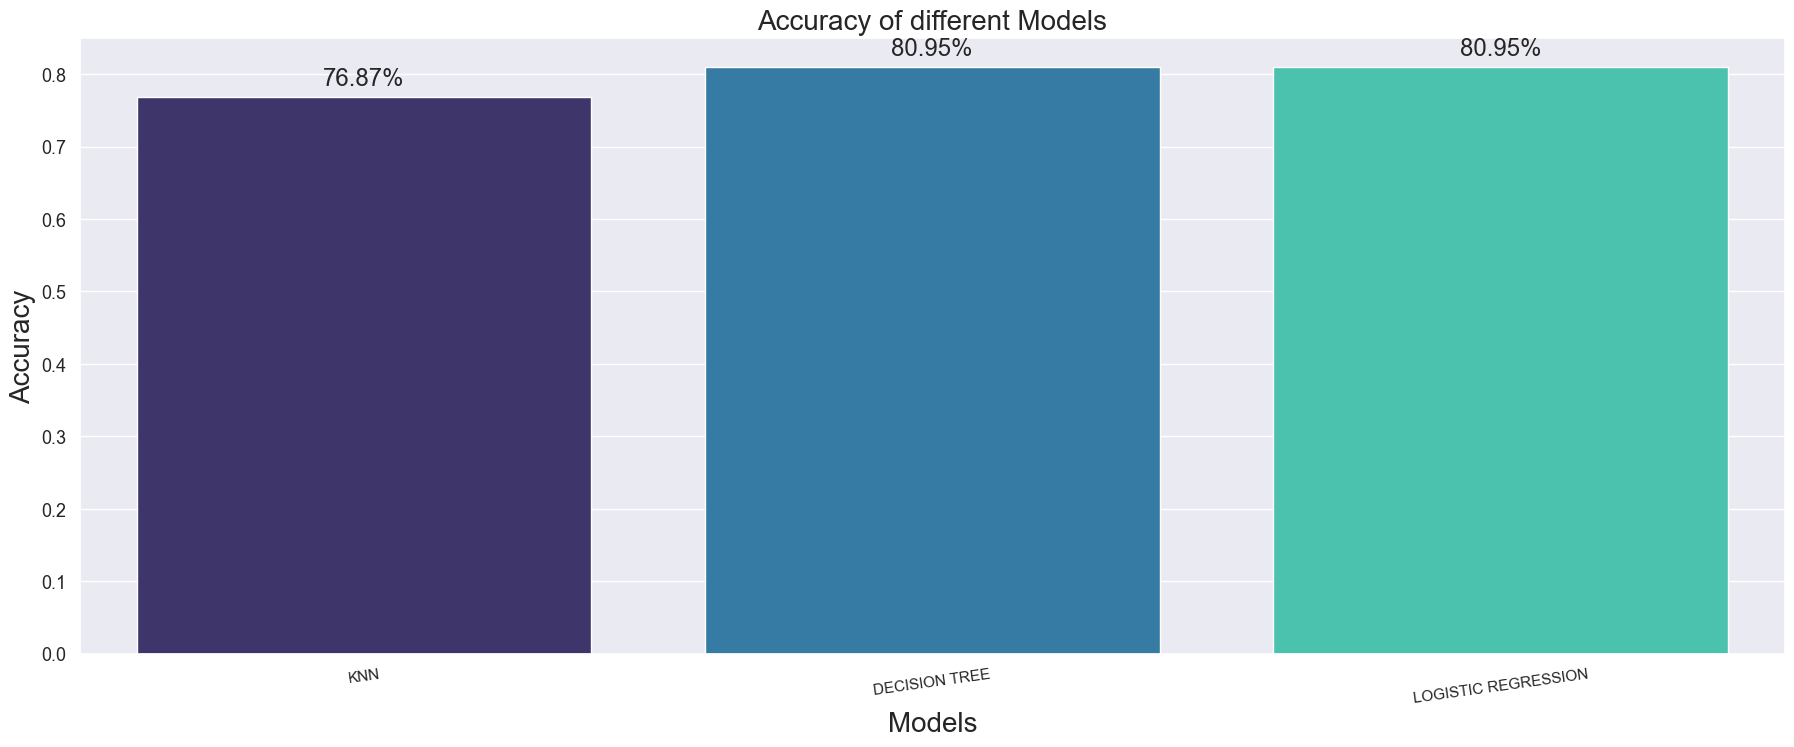

In [28]:
models = ["KNN", "DECISION TREE", "LOGISTIC REGRESSION"]
accuracies = [knn_score, dec_score, lg_score]

sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='x-large')

plt.show()